In [288]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [289]:
data_train = pd.read_csv("train.csv")
data_test = pd.read_csv("test.csv")

In [290]:
data_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [291]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [292]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [293]:
def drop_feas(df):
    drop_feas = ["Name", "Ticket"]
    df = df.drop(drop_feas, axis=1)
    return df

def simplify_age(df):
    df.Age = df.Age.fillna(-0.5)
    bins = (-1, 0, 5, 12, 18, 25, 35, 60, 100)
    group_names = ["No_info", "Baby", "Child", "Teenager", "Student", "Young Adult", "Adult", "Senior"]
    categories = pd.cut(df.Age, bins, labels=group_names)
    df.Age = categories
    return df

def fill_na_fare(df):
    df.Fare = df.Fare.fillna(method="bfill")
    return df
    
def simplify_cabin(df):
    df.Cabin = df.Cabin.fillna("N")
    df.Cabin = df.Cabin.apply(lambda x: x[0])
    return df

def fill_na_embarked(df):
    df.Embarked = df.Embarked.fillna("S")
    return df

def transform_data(df):
    df = simplify_age(df)
    df = fill_na_fare(df)
    df = simplify_cabin(df)
    df = fill_na_embarked(df)
    df = drop_feas(df)
    return df

In [294]:
df_train = transform_data(data_train)
df_test = transform_data(data_test)

In [295]:
df_train.sample()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
529,530,0,2,male,Student,2,1,11.5,N,S


In [296]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
Age            891 non-null category
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Cabin          891 non-null object
Embarked       891 non-null object
dtypes: category(1), float64(1), int64(5), object(3)
memory usage: 64.0+ KB


In [297]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null object
Age            418 non-null category
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           418 non-null float64
Cabin          418 non-null object
Embarked       418 non-null object
dtypes: category(1), float64(1), int64(4), object(3)
memory usage: 27.0+ KB


In [298]:
df_train.sample()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
818,819,0,3,male,Adult,0,0,6.45,N,S


In [299]:
df_test.sample()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
239,1131,1,female,Adult,1,0,106.425,C,C


In [300]:
from sklearn import preprocessing

In [301]:
def encode_feas(df_train, df_test):
    feas = ["Sex", "Age", "Cabin", "Embarked"]
    df_combined = pd.concat([df_train[feas], df_test[feas]])
    
    for fea in feas:
        le = preprocessing.LabelEncoder()
        le = le.fit(df_combined[fea])
        df_train[fea] = le.transform(df_train[fea])
        df_test[fea] = le.transform(df_test[fea])
        
    return df_train, df_test

In [302]:
df_train, df_test = encode_feas(df_train, df_test)

In [303]:
df_train.sample()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
249,250,0,2,1,0,1,0,26.0,7,2


In [304]:
df_test.sample()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
197,1089,3,0,6,0,0,7.775,7,2


In [305]:
df_train = df_train.set_index(df_train.PassengerId).drop(["PassengerId"], axis=1)
df_test = df_test.set_index(df_test.PassengerId).drop(["PassengerId"], axis=1)

In [306]:
df_train.sample()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,,
250,0,2,1,0,1,0,26.0,7,2


In [307]:
df_test.sample()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,
948,3,1,7,0,0,7.8958,7,2


In [308]:
y = df_train.Survived
X = df_train.drop(["Survived"], axis=1)

In [270]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [276]:
clf = RandomForestClassifier()
grid_params = {"n_estimators": [4,6,8,10,12],
              "criterion": ["gini", "entropy"],
              "max_depth": [4,6,8,10],
              "max_features": ["auto", "sqrt", "log2"]}
model = GridSearchCV(clf, grid_params, "accuracy")
model = model.fit(X,y)

In [277]:
model.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'sqrt',
 'n_estimators': 8}

In [278]:
best_model = model.best_estimator_
best_model.fit(X,y)
predictions = best_model.predict(df_test)

In [284]:
output = pd.DataFrame({"PassengerId": df_test.index, "Survived": predictions})

In [287]:
output.to_csv("submission.csv")

/Users/mac/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])
/Users/mac/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


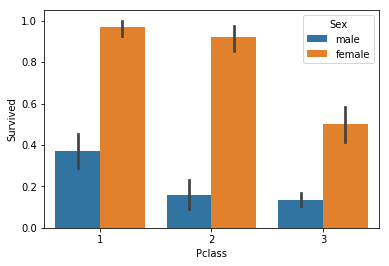

In [39]:
sns.barplot(x="Pclass", y="Survived", hue="Sex", data=data_train)

/Users/mac/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])
/Users/mac/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


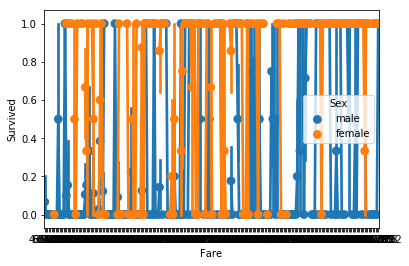

In [24]:
sns.pointplot(x="Fare", y="Survived", hue="Sex", data=data_train)